In [28]:
#Importing libraries
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset into a pandas DataFrame
df_main=pd.read_csv('C:/Users/raksh/Downloads/diabetes1 (1).csv')

# Display the first few rows of the pre-processed dataset
print("First few rows:")
df_main.head()


First few rows:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NEW_Glucose_low,...,NEW_Glucose_prediabetes,NEW_BMI_2 degree obesity,NEW_BMI_3 degree obesity,NEW_BMI_normal,NEW_BMI_overweight,NEW_BMI_underweight,NEW_AGE_old age,NEW_AGE_young age,NEW_BloodPressure_hypertension,NEW_BloodPressure_prehypertension
0,0.6,0.765432,-0.012662,0.857143,0.000000,0.131868,0.665359,1.235294,1,0,...,0,0,0,0,0,0,0,0,0,0
1,-0.4,-0.790123,-0.387662,0.000000,0.000000,-0.637363,-0.056209,0.117647,0,0,...,0,0,0,0,1,0,0,1,0,0
2,1.0,1.629630,-0.512662,0.000000,0.000000,-1.000000,0.783007,0.176471,1,0,...,0,0,0,1,0,0,0,1,0,0
3,-0.4,-0.691358,-0.387662,-0.857143,-2.108696,-0.472527,-0.537255,-0.470588,0,0,...,0,0,0,0,1,0,0,1,0,0
4,-0.6,0.493827,-2.012662,0.857143,1.891304,1.175824,2.163399,0.235294,1,0,...,0,0,1,0,0,0,0,1,0,0


In [29]:
df = df_main[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']]

#Spliting the dataset into features and target variable
X = df.drop('Outcome', axis=1)
y = df['Outcome']


In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

diabetes_features = [x for i,x in enumerate(df.columns) if i!=8]

def plot_feature_importances_diabetes(model):
    plt.figure(figsize=(8, 6))
    n_features = 8  # Update this value if the number of features changes
    sns.barplot(x=model.feature_importances_, y=diabetes_features)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.title("Feature Importances across the dataset")
    plt.show()


##### X_train, y_train: These contain the features and labels, respectively, for the training set.
##### X_val, y_val: These contain the features and labels, respectively, for the validation set.
##### X_test, y_test: These contain the features and labels, respectively, for the testing set.
##### The data is now split as follows:

##### 60% of the original data is in the training set.
##### 20% of the original data is in the validation set.
##### 20% of the original data is in the testing set.

In [31]:
# Splitting the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Further splitting the training data into 75% training and 25% validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Feature importance in Decision Tree Classifier 

Accuracy on training set: 1.000
Accuracy on validation set: 1.000
Accuracy on test set: 0.721

With max_depth=3:
Accuracy on training set: 0.775
Accuracy on validation set: 0.818
Accuracy on test set: 0.760

Pregnancies: 0.0000

Glucose: 0.5966

BloodPressure: 0.0000

SkinThickness: 0.0000

Insulin: 0.0000

BMI: 0.2633

DiabetesPedigreeFunction: 0.0000

Age: 0.1401


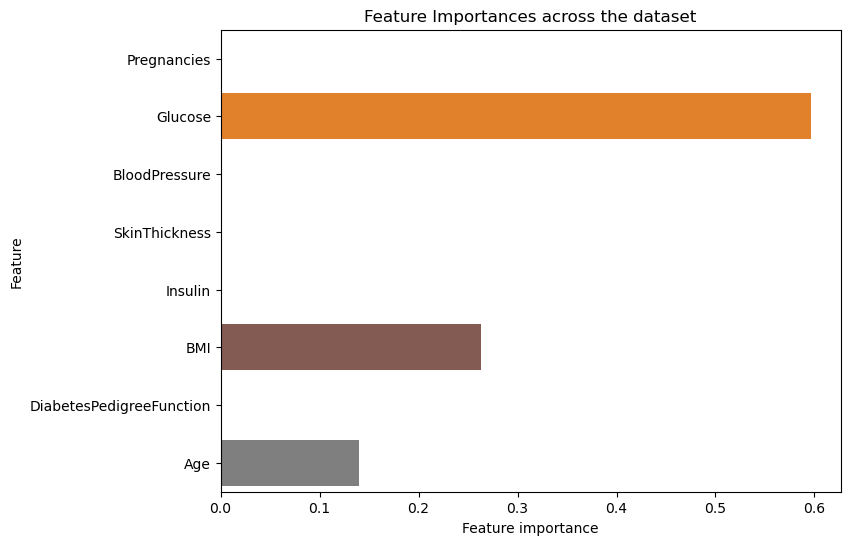

In [32]:
# Train a Decision Tree Classifier with default parameters
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

# Print accuracy on training, validation, and test sets
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on validation set: {:.3f}".format(tree.score(X_val, y_val)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

# Train a Decision Tree Classifier with max_depth=3
tree = DecisionTreeClassifier(max_depth=3, random_state=0)
tree.fit(X_train, y_train)

# Print accuracy on training, validation, and test sets
print("\nWith max_depth=3:")
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on validation set: {:.3f}".format(tree.score(X_val, y_val)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

# Get feature importances
feature_importances = tree.feature_importances_

# Print feature importances
for feature, importance in zip(X_train.columns, feature_importances):
    print(f"\n{feature}: {importance:.4f}")

# Assuming you have a function plot_feature_importances_diabetes defined
plot_feature_importances_diabetes(tree)

##### Feature "Glucose" is by far the most important feature.

### Feature importance in Random Forest

Accuracy on training set: 1.000
Accuracy on validation set: 1.000
Accuracy on test set: 0.747

With max_depth=3:
Accuracy on training set: 0.793
Accuracy on validation set: 0.805
Accuracy on test set: 0.799

Pregnancies: 0.0770

Glucose: 0.2479

BloodPressure: 0.0848

SkinThickness: 0.0824

Insulin: 0.0611

BMI: 0.1673

DiabetesPedigreeFunction: 0.1269

Age: 0.1526


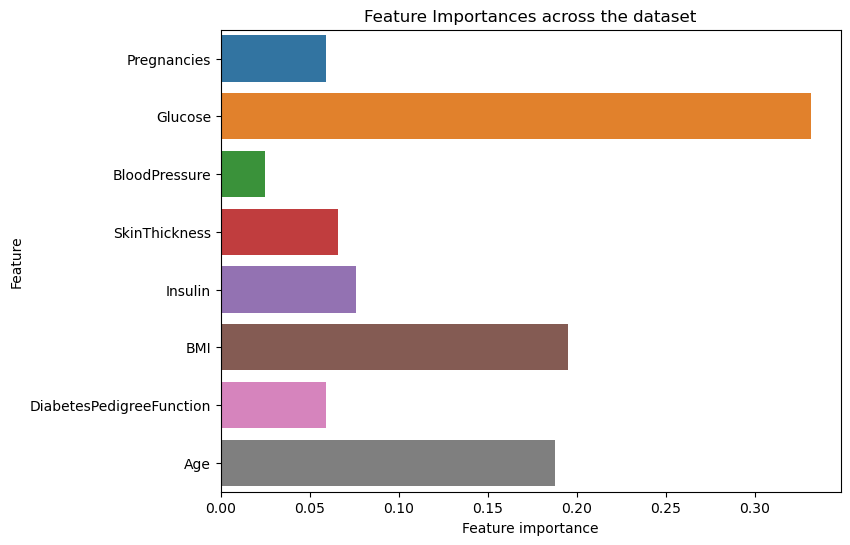

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Train a Random Forest Classifier with default parameters
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)

# Print accuracy on training, validation, and test sets
print("Accuracy on training set: {:.3f}".format(rf.score(X_train, y_train)))
print("Accuracy on validation set: {:.3f}".format(rf.score(X_val, y_val)))
print("Accuracy on test set: {:.3f}".format(rf.score(X_test, y_test)))

# Train a Random Forest Classifier with max_depth=3
rf1 = RandomForestClassifier(max_depth=3, n_estimators=100, random_state=0)
rf1.fit(X_train, y_train)

# Print accuracy on training, validation, and test sets
print("\nWith max_depth=3:")
print("Accuracy on training set: {:.3f}".format(rf1.score(X_train, y_train)))
print("Accuracy on validation set: {:.3f}".format(rf1.score(X_val, y_val)))
print("Accuracy on test set: {:.3f}".format(rf1.score(X_test, y_test)))

# Get feature importances
feature_importances = rf.feature_importances_

# Print feature importances
for feature, importance in zip(X_train.columns, feature_importances):
    print(f"\n{feature}: {importance:.4f}")

# Assuming you have a function plot_feature_importances_diabetes defined
plot_feature_importances_diabetes(rf1)

##### Feature "Glucose" is by far the most important feature.